In [1]:
import numpy as np
import supervillain as sv
from supervillain.h5 import H5able
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler
import matplotlib.colors as colors
from matplotlib import cm as cm
from tqdm.notebook import tqdm

In [2]:
configs = 1000

L = sv.lattice.Lattice2D(5)
S = sv.action.Worldline(L,0.5)
W = sv.generator.worms.UndirectedWorm(S,1)

p = sv.generator.constraint.PlaquetteUpdate(S)
h = sv.generator.constraint.HolonomyUpdate(S)
P = sv.generator.combining.Sequentially((p, h))  
ensembleworm = sv.ensemble.Ensemble(S)
ensembleworm = ensembleworm.generate(configs,W,progress = tqdm)
# ensemblePlaq = sv.ensemble.Ensemble(S)
# ensemblePlaq = ensemblePlaq.generate(configs,P,progress = tqdm)

  0%|          | 0/999 [00:00<?, ?it/s]

In [3]:
W.erasure_Ns

[[1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.7855459507107485, 1.7855459507107485],
 [1.7855459507107485, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.7855459507107487, 1.7855459507107487],
 [1.7855459507107485, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.4715177646857693],
 [1.4715177646857693, 1.7855459507107485],
 [2.0995741367357277, 1.7855459507107485],
 [1.7855459507107485, 1.7855459507107485],
 [1.4715177646857693, 1.4715177646857693],
 [1.7855459507107487, 1.7855459507107487],
 [1.4715177646857693, 1.4715177646857693],
 [1.7855459

In [4]:
tauworm = sv.analysis.autocorrelation_time(ensembleworm.InternalEnergyDensity)
tauworm

8

In [5]:
[W.avg_length_all,W.avg_length_accepted,W.avg_length_nontriv]

[2.858, 2.8927125506072873, 8.608433734939759]

In [6]:
W.acceptance/W.sweeps

0.9842127700730491

In [7]:
[[np.sum(j[0]),np.sum(j[1])] for j in W.erasure_probs]

AttributeError: 'UndirectedWorm' object has no attribute 'erasure_probs'

In [ ]:
print(W.report())

There were 976 single-site proposals accepted of 0 proposed updates.
    0.976000 acceptance rate
    0.983850 average Metropolis acceptance probability.


In [ ]:
bp = sv.analysis.Bootstrap(ensemblePlaq,100)
np.mean(bp.InternalEnergyDensity)

NameError: name 'ensemblePlaq' is not defined

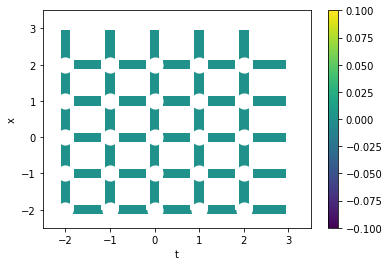

In [ ]:
W = sv.generator.worms.UndirectedWorm(S,1)
a={}
a['m'] = L.form(1)
newstep = W.step(a)
fig, ax = plt.subplots(1,1)
L.plot_form(1,newstep['m'],ax,linkwidth=0.05,norm = colors.CenteredNorm())
fig.colorbar(ax.get_children()[0])

In [ ]:
W.startpointlist

[array([ 1, -2])]

In [ ]:
j=2
config = W.lastconfigslist[j]
fig, ax = plt.subplots(1,1)
L.plot_form(1,config,ax,linkwidth=0.05,norm = colors.CenteredNorm())
fig.colorbar(ax.get_children()[0])

IndexError: list index out of range

In [ ]:
W.lastconfigslist[2]

array([[[ 0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]])

F:\Users\COEP_Leader\Documents\Supervillain\supervillain\supervillain\lattice.py:936: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  axis.scatter(self.T, self.X, color=background, **zorder, **marker)


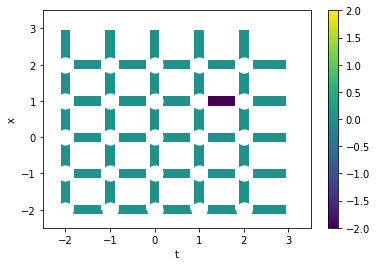

In [4]:
test = L.form(1)
test[0,1,1]=-2
test[1,1,1]=0
fig, ax = plt.subplots(1,1)
norm = colors.CenteredNorm()
L.plot_form(1,test,ax,linkwidth=0.05,norm = norm)
norm.autoscale(test)
# norm.vmax = np.max(np.abs(test.flatten()))
fig.colorbar(ax.get_children()[0])

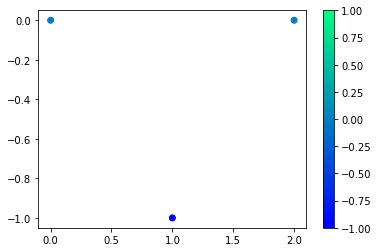

In [ ]:
fig,ax = plt.subplots(1,1)
cmap = cm.winter
ax.scatter([0,1,2],[0,-1,0],c=[0,-1,0],cmap = cmap, norm = colors.CenteredNorm())
fig.colorbar(ax.get_children()[0])
ax.get_children()[0]